# Processing the Data

In [19]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [20]:
# getting the path of the data and storing the dataset...
raw_data_path = os.path.join(os.path.pardir, "data", "raw")
dataset_path = os.path.join(raw_data_path, "dataset.csv")
df = pd.read_csv(dataset_path, index_col = "Roll")

In [21]:
# getting all the columns and number of values in the dataset...
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 63 entries, 2.0 to 64.0
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CT-1 (Marks: 20)                         57 non-null     object 
 1   CT-2 (Marks: 20)                         57 non-null     object 
 2   CT-3 (Marks: 20)                         57 non-null     object 
 3   CT-4 (Marks: 20)                         57 non-null     object 
 4   Class Test (Total of best 3, Marks: 60)  57 non-null     object 
 5   Attendance (Marks: 15)                   57 non-null     object 
 6   Observation (Marks: 15)                  57 non-null     object 
 7   Total (Marks: 90)                        57 non-null     object 
 8   Exam Mark (105)                          54 non-null     float64
 9   Exam Mark (105).1                        54 non-null     float64
 10  Mark total 300                           54 no

In [33]:
# we observe that the original dataset has 57 students
# let us get the values of a random column to ensure we have the data...
df["CT-4 (Marks: 20)"]


Roll
2.0       18
3.0       11
4.0      6.5
5.0        0
6.0     15.5
        ... 
60.0      18
61.0       0
62.0    12.5
63.0     7.5
64.0      15
Name: CT-4 (Marks: 20), Length: 63, dtype: object

## Feature Engineering

In [42]:
# changing the column syntax
df["CT_1_Max_20"] = np.where(True, df["CT-1 (Marks: 20)"], 0)
df["CT_2_Max_20"] = np.where(True, df["CT-2 (Marks: 20)"], 0)
df["CT_3_Max_20"] = np.where(True, df["CT-3 (Marks: 20)"], 0)
df["CT_4_Max_20"] = np.where(True, df["CT-4 (Marks: 20)"], 0)
df["CT_Total_60"] = np.where(True, df["Class Test (Total of best 3, Marks: 60)"], 0)
df["Attendance"] = np.where(True, df["Attendance (Marks: 15)"], 0)
df["Observation"] = np.where(True, df["Observation (Marks: 15)"], 0)

In [35]:
# deleting the columns that were there previously...
# for easy readablity
df.drop(["CT-1 (Marks: 20)", "CT-2 (Marks: 20)", "CT-3 (Marks: 20)", "CT-4 (Marks: 20)", "Class Test (Total of best 3, Marks: 60)", "Attendance (Marks: 15)", "Observation (Marks: 15)"], axis = 1, inplace = True)

In [43]:
# forgot to do the column replacement for these cells...
df["Exam_1_105"] = np.where(True, df["Exam Mark (105)"], 0)
df["Exam_2_105"] = np.where(True, df["Exam Mark (105).1"], 0)
df["Total"] = np.where(True, df["Mark total 300"], 0)

# now deleting the columns present previously
df.drop(["Exam Mark (105)", "Exam Mark (105).1", "Mark total 300"], axis = 1, inplace = True)

In [50]:
# lets convert the non-numeric data to numeric...
df['CT_1_Max_20'] = pd.to_numeric(df['CT_1_Max_20'], errors='coerce')
df['CT_2_Max_20'] = pd.to_numeric(df['CT_2_Max_20'], errors='coerce')
df['CT_3_Max_20'] = pd.to_numeric(df['CT_3_Max_20'], errors='coerce')
df['CT_4_Max_20'] = pd.to_numeric(df['CT_4_Max_20'], errors='coerce')
df['CT_Total_60'] = pd.to_numeric(df['CT_Total_60'], errors='coerce')
df['Attendance'] = pd.to_numeric(df['Attendance'], errors='coerce')
df['Observation'] = pd.to_numeric(df['Observation'], errors='coerce')

## Distributions - 1

In [81]:
# now lets compare the attendance with the total median score
# NOTE : WE DONT USE MEAN AS IT IS AFFECTED BY EXTREME VALUES
df.groupby("Attendance").Total.median()

Attendance
10.5    136.50
13.5    154.25
15.0    166.00
Name: Total, dtype: float64

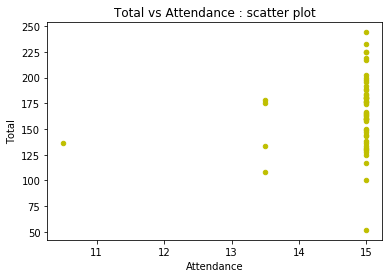

In [58]:
# lets see what the scatter plot looks like
df.plot.scatter(x = "Attendance", y = "Total", color = "y", title = "Total vs Attendance : scatter plot")

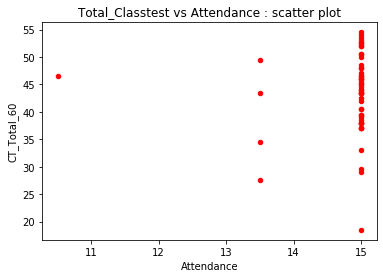

In [63]:
# the scatter plot shows us that there is not much connection between having low attendance and low total...
# now let us consider the total class test marks with attendance
df.plot.scatter(x = "Attendance", y = "CT_Total_60", color = "r", title = "Total_Classtest vs Attendance : scatter plot", alpha = 1)

In [64]:
# again we find that the scatter plot shows that there is not much relation between attendance and total class test marks..
# Lets get the count of the people having different attendances
df.Attendance.value_counts()

15.0    49
13.5     4
10.5     1
Name: Attendance, dtype: int64

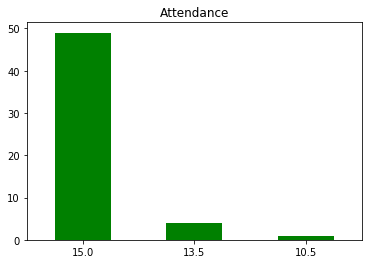

In [65]:
# only 5 out of 54 have a less than perfect attendance
# this is the breakup in a bar plot
df.Attendance.value_counts().plot(kind = "bar", rot = "0", title = "Attendance", color = "g")

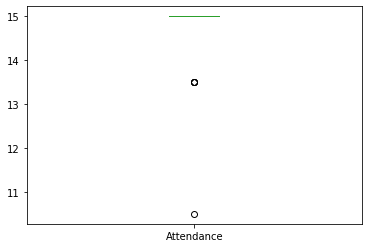

In [66]:
# we try the boxplot, which is almost useless...
df.Attendance.plot(kind = "box")

## Binning the marks

In [92]:
# as we have a range of values for the marks in each test, we use outlier elimination
# assorting the marks of each column into labelled bins(labelling the given bins)
pd.qcut(df.CT_1_Max_20, 4, labels = ["very_low", "low", "high", "very_high"])
pd.qcut(df.CT_2_Max_20, 4, labels = ["very_low", "low", "high", "very_high"])
pd.qcut(df.CT_3_Max_20, 4, labels = ["very_low", "low", "high", "very_high"])
pd.qcut(df.CT_4_Max_20, 4, labels = ["very_low", "low", "high", "very_high"])
pd.qcut(df.Exam_1_105, 4, labels = ["very_low", "low", "high", "very_high"])
pd.qcut(df.CT_Total_60, 4, labels = ["very_low", "low", "high", "very_high"])

Roll
2.0          high
3.0      very_low
4.0      very_low
5.0          high
6.0          high
          ...    
60.0    very_high
61.0    very_high
62.0     very_low
63.0     very_low
64.0    very_high
Name: CT_Total_60, Length: 63, dtype: category
Categories (4, object): [very_low < low < high < very_high]

In [93]:
# creating these bins for the marks and assigning them very_low, low, high, very_high in ascending order
df["CT_1_Marks_bin"] = pd.qcut(df.CT_1_Max_20, 4, labels = ["very_low", "low", "high", "very_high"])
df["CT_2_Marks_bin"] = pd.qcut(df.CT_2_Max_20, 4, labels = ["very_low", "low", "high", "very_high"])
df["CT_3_Marks_bin"] = pd.qcut(df.CT_3_Max_20, 4, labels = ["very_low", "low", "high", "very_high"])
df["CT_4_Marks_bin"] = pd.qcut(df.CT_4_Max_20, 4, labels = ["very_low", "low", "high", "very_high"])
df["Exam_1_Marks_bin"] = pd.qcut(df.Exam_1_105, 4, labels = ["very_low", "low", "high", "very_high"])
df["Exam_2_Marks_bin"] = pd.qcut(df.Exam_2_105, 4, labels = ["very_low", "low", "high", "very_high"])
df["CT_Total_bin"] = pd.qcut(df.CT_Total_60, 4, labels = ["very_low", "low", "high", "very_high"])

In [94]:
# checking the info once more
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 63 entries, 2.0 to 64.0
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Total (Marks: 90)  57 non-null     object  
 1   CT_1_Max_20        54 non-null     float64 
 2   CT_2_Max_20        54 non-null     float64 
 3   CT_3_Max_20        54 non-null     float64 
 4   CT_4_Max_20        54 non-null     float64 
 5   CT_Total_60        54 non-null     float64 
 6   Attendance         54 non-null     float64 
 7   Observation        54 non-null     float64 
 8   Exam_1_105         54 non-null     float64 
 9   Exam_2_105         54 non-null     float64 
 10  Total              54 non-null     float64 
 11  CT_1_Marks_bin     54 non-null     category
 12  CT_2_Marks_bin     54 non-null     category
 13  CT_3_Marks_bin     54 non-null     category
 14  CT_4_Marks_bin     54 non-null     category
 15  Exam_1_Marks_bin   54 non-null     category
 16  Exam

## Distributions - 2

In [85]:
# lets look at the summary stats for the new dataset

df.groupby(["Attendance"]).agg({"Exam_1_105" : 'median', "Exam_2_105" : "median"})

,Exam_1_105,Exam_2_105
Attendance,,
10.5,9.0,57.0
13.5,26.5,56.0
15.0,38.0,60.0


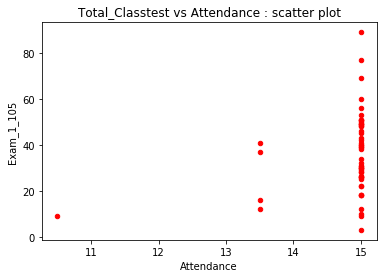

In [86]:
# From the above data we infer that the attendance of a student had an impact on the median score in the Exam 1...
# lets see the scatter plot...
df.plot.scatter(x = "Attendance", y = "Exam_1_105", color = "r", title = "Total_Classtest vs Attendance : scatter plot", alpha = 1)

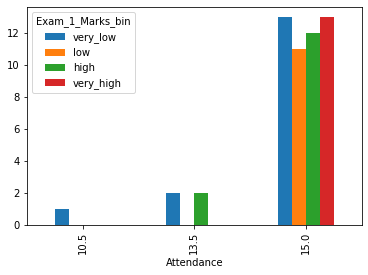

In [89]:
# we use the binning to get a distribution
pd.crosstab(df.Attendance, df.Exam_1_Marks_bin).plot(kind = "bar")

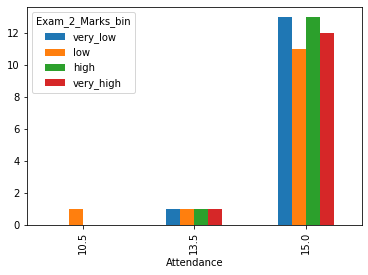

In [90]:
# using the last few distributions we see that low attendence has had a negative impact on the marks in exam 1
pd.crosstab(df.Attendance, df.Exam_2_Marks_bin).plot(kind = "bar")

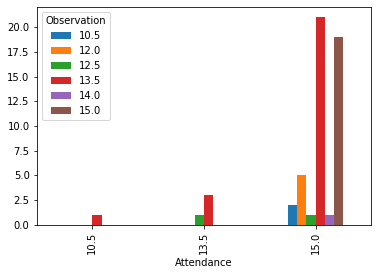

In [91]:
# attendance doesnt have that much of an impact on Exam 2 marks...

# now let us look at the relation with "observation" column...
pd.crosstab(df.Attendance, df.Observation).plot(kind = "bar")

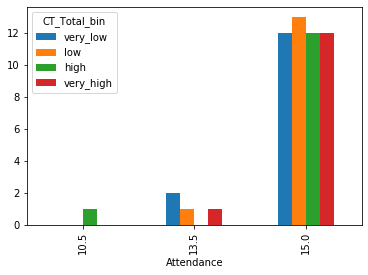

In [95]:
# again, there doesnt seem to be much connection between attendance and the Observation column

# now let us look at the relation with the Total class test marks
pd.crosstab(df.Attendance, df.CT_Total_bin).plot(kind = "bar")

In [96]:
# We notice that the relation between the total class test score(best of 3) is not very much connected to Attendance
# This is the relationshio that we have found using the data
# now let us save our processed work

## Saving the processed data

In [100]:
# saving the processed data
processed_data_path = os.path.join(os.path.pardir, "data", "processed")
write_data_path = os.path.join(processed_data_path, "dataset.csv")

In [101]:
# saving the data set
df.to_csv(write_data_path)